# Proyecto: 
## Transparencia inducida electromagnéticamente (configuración lambda).

# Método de Runge-Kutta

In [5]:
function metodo_RK4(f,x0,ti,tf,n)
    #Buscamos h
    h=(tf-ti)/n
    #Hacemos el primer intervalo
    listt=linspace(ti,tf,n+1)
    listx=[]
    #Tomamos el primer valor de x0 en la lista solución
    push!(listx,x0)
    x=x0
    #Método de Runge-kutta orden 4
    for i in 1:length(listt)-1
        k1=f(x,listt[i])
        k2=f(x+(h/2)*k1,listt[i]+(h/2))
        k3=f(x+(h/2)*k2,listt[i]+(h/2))
        k4=f(x+h*k3,listt[i+1])
        y=x+(h/6)*(k1+2*k2+2*k3+k4)
        #Se incerta en la lista
        push!(listx,y)
        #Se puede omitir
        x=y
    end
    return listt,listx
end

function metodo_RK4h(f,xi,ti,tf,h)
    #Calculo de n dado h
    n=Int(round((tf-ti)/h))
    return metodo_RK4(f,xi,ti,tf,n)
end

metodo_RK4h (generic function with 1 method)

## Introducción

La transparencia inducida electromagnéticamente (EIT) es un fenómeno óptico-cuántico que consiste en alterar la respuesta óptica de un medio atómico mediante la interferencia cuántica de los estados excitados donde los estados atómicos son coherentes debido a un láser. Esta alteración de la respuesta óptica consiste en el cambio de la suceptibilidad a primer orden, esto es, un cambio en la absorción y en el indice de refracción de medio atómico.

La respuesta lineal de un átomo debido a luz resonante es descrito por la suceptibilidad de primer orden $\chi^{(1)}$. La parte imaginaria la suceptibilidad $\text{Im}[\chi^{(1)}]$ determina la disipación del campo por el gas atómico, es decir, la absorción mientras que la parte real $\text{Re}[\chi^{(1)}]$ determina el índice de refracción.

En el caso del EIT, se tiene un sistema cuántico de 3 estados. Un modo de tener este sistema cuántico es mediante la configuración $\Lambda$ que tiene un estado base, un estado excitado y un tercer estado acoplado con el estado excitado. Sin embargo, la transición entre el estado acoplado con el estado base está prohibido.

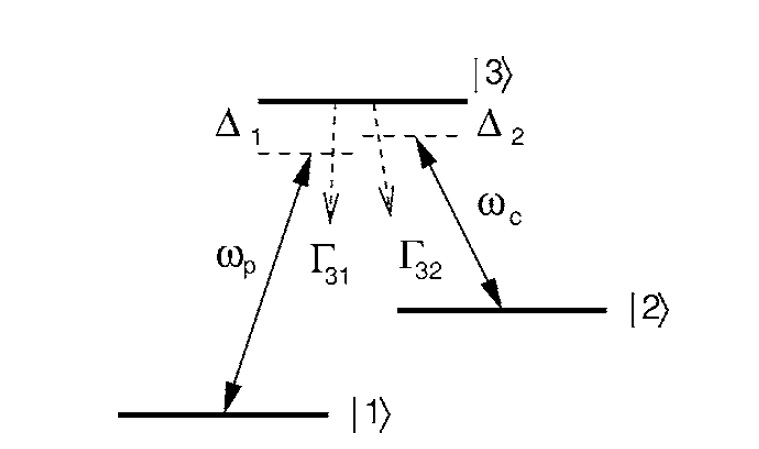

Los estados $|1>$, $|2>$ y $|3>$ corresponden a los estados base, acoplado y excitado respectivamente. Por simplicidad, se tomó $\Gamma_{31} = \Gamma_{32} = \gamma$ que es un factor de decaemiento del estado excitado al estado base o acoplado.

El hamiltoniano de nuestra sistema según el artículo de Marangos [1] esta dado por:

$$ H_{\text{int}} = H_{.c.} + H_* = H_{.c.} -\frac{\Omega_p}{2}[e^{i(\omega_{eg}-\omega_p)t} \sigma_{eg} + \sigma_{ge}e^{-i(\omega_{eg}-\omega_p)t}] - \frac{\Omega_c}{2}[e^{i(\omega_{el}-\omega_c)t} \sigma_{el} + \sigma_{le}e^{-i(\omega_{el}-\omega_c)t}]$$

donde $\Omega_p$, $\Omega_c$ son frecuencias de Rabi, $\omega_g$, $\omega_l$, $\omega_e$ son frecuencias que dependen de los estados del sistema, $\omega_p$, $\omega_c$ son las frecuencias del campo eléctrico inducido, $t$ es el tiempo y $\sigma_{ij}$ son entradas de matriz tales que $\sigma_{ij} = |i><j|$. El segundo termino a la derecha desribe la interacción debido al acoplamiento láser-átomo en el sistema. 

Denotemos al estado base con el subíndice g, al estado excitado con e y a un estado ligado con l. Nuestra matriz de densidad resulta ser de 3x3 y queda de la forma:

$$
\rho = \left( 
\begin{array}{ccc}
   \rho_{gg} & \rho_{gl} & \rho_{ge} \\
   \rho_{lg} & \rho_{ll} & \rho_{le} \\
   \rho_{eg} & \rho_{el} & \rho_{ee} \\
  \end{array}
\right)  
$$  

Las ecuaciones de movimiento de nuestra matriz de densidades $\rho$ están dadas por

$$\dot \rho = -i [H_*,\rho] + \mathcal{L}_{le}[\rho] + \mathcal{L}_{ge}[\rho]$$

donde

$$\mathcal{L}_{ge}[\rho] = \frac{\gamma}{2}[2\sigma_{ge}\rho\sigma_{eg} - \sigma_{eg}\sigma_{ge}\rho - \rho\sigma_{eg}\sigma_{ge}]$$

$$\mathcal{L}_{le}[\rho] = \frac{\gamma}{2}[2\rho\sigma_{le}\rho\sigma_{el} - \sigma_{el}\sigma_{le}\rho - \rho\sigma_{el}\sigma_{le}]$$

Por lo tanto, las ecuaciones resultantes para cada entrada de $\rho$ son:

$$\rho'_{gg}(t) = \gamma\rho_{ee}(t) - i\left(\frac{1}{2}\Omega\rho_{ge}(t)e^{-i(\omega_e-\omega_g)t} - \frac{1}{2}\Omega\rho_{eg}(t)e^{i(\omega_e-\omega_g)t}\right)$$

$$\rho'_{gl}(t) = -i\left(-\frac{1}{2}\Omega\rho_{el}e^{i(\omega_e-\omega_g)t} -\omega_l \rho_{gl}(t) + \omega_{g}\rho_{gl}(t) + \frac{1}{2}\Omega_c \rho_{ge}(t) e^{i(\omega_e-\omega_1)t}\right)$$

$$\rho'_{ge}(t) = -\gamma\rho_{ge}(t) - i\left(\frac{1}{2}\Omega\rho_{ee}(t)e^{-i(\omega_e-\omega_g)t} + \frac{1}{2}\Omega_c\rho_{g1}(t)e^{i(\omega_e-\omega_l)t} -\omega_e\rho_{ge}(t) + \omega_g\rho_{ge}(t) + \frac{1}{2}\Omega\rho_{gg}(t)e^{i(\omega_e-\omega_g)t}    \right)$$

$$\rho'_{lg}(t) = i\left(-\frac{1}{2}\Omega\rho_{el}e^{-i(\omega_e-\omega_g)t} -\omega_l \rho_{gl}(t) + \omega_{g}\rho_{gl}(t) + \frac{1}{2}\Omega_c \rho_{ge}(t) e^{-i(\omega_e-\omega_1)t}\right)$$

$$\rho'_{ll}(t) = \gamma\rho_{ee}(t) - i\left(\frac{1}{2}\Omega_c\rho_{le}(t)e^{-i(\omega_e-\omega_g)t} - \frac{1}{2}\Omega_c\rho_{el}(t)e^{i(\omega_e-\omega_l)t}\right)$$

$$\rho'_{le}(t) = -\gamma\rho_{le}(t) - i\left(\frac{1}{2}\Omega_c\rho_{ll}(t)e^{i(\omega_e-\omega_l)t} + \frac{1}{2}\Omega\rho_{lg}(t)e^{i(\omega_e-\omega_g)t} -\omega_e\rho_{le}(t) + \omega_l\rho_{le}(t) - \frac{1}{2}\Omega_c\rho_{ee}(t)e^{i(\omega_e-\omega_l)t} \right)$$

$$\rho'_{eg}(t) = -\gamma\rho_{ge}(t) + i\left(\frac{1}{2}\Omega\rho_{ee}(t)e^{-i(\omega_e-\omega_g)t} + \frac{1}{2}\Omega_c\rho_{g1}(t)e^{-i(\omega_e-\omega_l)t} -\omega_e\rho_{ge}(t) + \omega_g\rho_{ge}(t) + \frac{1}{2}\Omega\rho_{gg}(t)e^{-i(\omega_e-\omega_g)t}\right)$$

$$\rho'_{el}(t) = -\gamma\rho_{le}(t) - i\left(\frac{1}{2}\Omega_c\rho_{ll}(t)e^{-i(\omega_e-\omega_l)t} + \frac{1}{2}\Omega\rho_{lg}(t)e^{-i(\omega_e-\omega_g)t} -\omega_e\rho_{le}(t) + \omega_l\rho_{le}(t) - \frac{1}{2}\Omega_c\rho_{ee}(t)e^{-i(\omega_e-\omega_l)t} \right)$$

$$\rho'_{ee}(t) = -2\gamma\rho_{ee}(t) - i\left(-\frac{1}{2}\Omega_c\rho_{le}(t)e^{-i(\omega_e-\omega_l)t} + \frac{1}{2}\Omega_c\rho_{e1}(t)e^{i(\omega_e-\omega_l)t} + \frac{1}{2}\Omega\rho_{eg}(t)e^{i(\omega_e-\omega_g)t} - \frac{1}{2}\Omega\rho_{ge}(t)e^{-i(\omega_e-\omega_g)t}\right)$$

Supongamos que la partícula está en el estado base en $t=0$. Entonces, nuestro vector de condiciones iniciales queda como:

$$
\rho(0) = \left( 
\begin{array}{c}
   \rho_{gg}(0) \\
   \rho_{lg}(0) \\
   \rho_{eg}(0) \\
   \rho_{gl}(0) \\
   \rho_{ll}(0) \\
   \rho_{el}(0) \\
   \rho_{ge}(0) \\
   \rho_{le}(0) \\
   \rho_{ee}(0) \\
  \end{array}
\right)  = 
\left( 
\begin{array}{c}
   1 \\
   0 \\
   0 \\
   0 \\
   0 \\
   0 \\
   0 \\
   0 \\
   0 \\
  \end{array}
\right)  
$$  


Sean $\vec{\mu}_{ge} = \mu_{ge}\hat{z}$ y $\vec{\mu}_{le} = \mu_{le}\hat{z}$ y $\varrho=N_{\text{atom}}/V$. Entonces la polarización es en la dirección $z$ dado por

$$P(t) = \varrho [\mu_{ge}\rho_{eg}e^{-i(\omega_e -\omega_g)t} + \mu_{gl}\rho_{el}e^{-i(\omega_e -\omega_l)t} + \text{c.c.}]$$

donde $\text{c.c.}$ es el complejo conjugado.

Con este resultado, se puede llegar a fórmula de la suceptibilidad a primer orden que está dado por

$$\chi^{(1)}(-\omega_p,\omega_p) = \frac{\left|\mu_{ge}\right|^2 \varrho}{\epsilon_0} \left[ \frac{4\delta(|\Omega_c|^2 - 4\delta\Delta) - 4\Delta \gamma^2}{\left||\Omega_c|^2 + (\gamma + i2\Delta)(\gamma + i2\delta)\right|^2} + i\frac{8\delta^2\gamma + 2\gamma(|\Omega_c|^2 + \gamma^2}{\left||\Omega_c|^2 + (\gamma + i2\Delta)(\gamma + i2\delta)\right|^2}   \right]$$

donde $\Delta = \Delta_1 = \omega_e-\omega_g-\omega_p$, $\Delta_2 = \omega_e-\omega_l-\omega_c$, $\Delta = \Delta_1-\Delta_2$ y suponiendo que $\gamma = \gamma_{eg} = \gamma_{lg}$.

## Código

### Parte I: Matriz de densidades

Condiciones iniciales:

In [6]:
#Condiciones físicas
γ=0
Ω=8
Ωc=1.5
ωe=2
ωg=0
ω1=ωl=1
#Identidficador de coeficientes
gg=1
gl=2
ge=3
lg=4
ll=5
le=6
eg=7
el=8
ee=9;

Formulación de operadores y de funciones a usar:

In [62]:
ρ0=
[1 0 0;
 0 0 0;
 0 0 0];

In [63]:
g=[1 0 0]
l=[0 1 0]
e=[0 0 1];

In [9]:
σ(x,y)=x'y

σ (generic function with 1 method)

In [10]:
H0=ωg*σ(g,g)+ωl*σ(l,l)+ωe*σ(e,e)

3×3 Array{Int64,2}:
 0  0  0
 0  1  0
 0  0  2

In [11]:
H1(t)=-Ω*1/2*(exp(-1im*(ωe-ωg)*t)*σ(e,g)+σ(g,e)*exp(1im*(ωe-ωg)*t))- Ωc*1/2*(exp(-1im*(ωe-ωl)*t)*σ(e,l) + σ(l,e)*exp(1im*(ωe-ωl)*t))

H1 (generic function with 1 method)

In [12]:
H(t)=H0+H1(t)

H (generic function with 1 method)

In [13]:
L1(ρ,t)=-1im*(H(t)*ρ-ρ*H(t))

L1 (generic function with 1 method)

In [14]:
L2(ρ,t)=γ*1/2*(2*σ(g,e)*ρ*σ(e,g)-σ(e,g)*σ(g,e)*ρ-ρ*σ(e,g)*σ(g,e))

L2 (generic function with 1 method)

In [15]:
L3(ρ,t)=γ*1/2*(2*σ(l,e)*ρ*σ(e,l)-σ(e,l)*σ(l,e)*ρ-ρ*σ(e,l)*σ(l,e))

L3 (generic function with 1 method)

In [16]:
L(ρ,t)=L1(ρ,t)+L2(ρ,t)+L3(ρ,t)

L (generic function with 1 method)

Función auxiliar

In [79]:
ω2=ωe-ωl
f(T)=exp.(-1im*ω2*T)

f (generic function with 1 method)

In [7]:
using PyPlot

Nuestro análisis corresponde en comparar la evolución temporal de los elementos de la matriz densidad $\rho_{gg}$, $\rho_{ll}$, $\rho_{ee}$ así como de la polarización $p(t)$ para diferentes valores del decaemiento $\gamma$. Para ello, se resuelve la ecuación diferencial de la matriz de densidad $\rho$ usando el método de Runge-Kutta de orden 4.

####  Dato: γ=0

In [19]:
γ=0
ρ=metodo_RK4h(L,ρ0,0,5,.001);

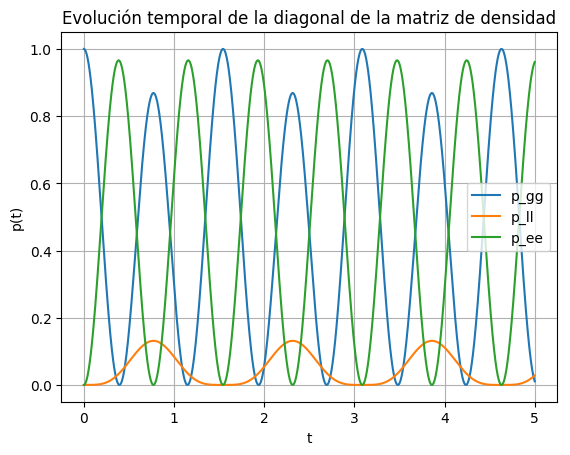

/usr/local/lib/python2.7/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [20]:
plot(map(x->x[1],ρ[1]),map(x->x[1],ρ[2]), label="p_gg")
plot(map(x->x[1],ρ[1]),map(x->x[5],ρ[2]), label="p_ll")
plot(map(x->x[1],ρ[1]),map(x->x[9],ρ[2]), label="p_ee")
legend()
xlabel("t")
ylabel("p(t)")
title("Evolución temporal de la diagonal de la matriz de densidad")
grid()
show();

In [77]:
Abs=[]
for i in 1:length(ρ[1])
    push!(Abs,ρ[2][i][4]*(f(ρ[1])[i]))
end

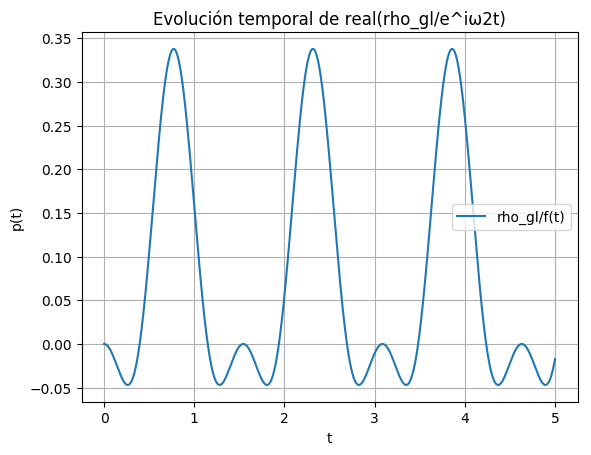

In [78]:
plot(map(x->x[1],ρ[1]),real(Abs), label="rho_gl/f(t)")
legend()
xlabel("t")
ylabel("p(t)")
title("Evolución temporal de real(rho_gl/e^iω2t)")
grid()
show();

####  Dato: γ=.01

In [23]:
γ=.01
ρ2=metodo_RK4h(L,ρ0,0,10,.001);

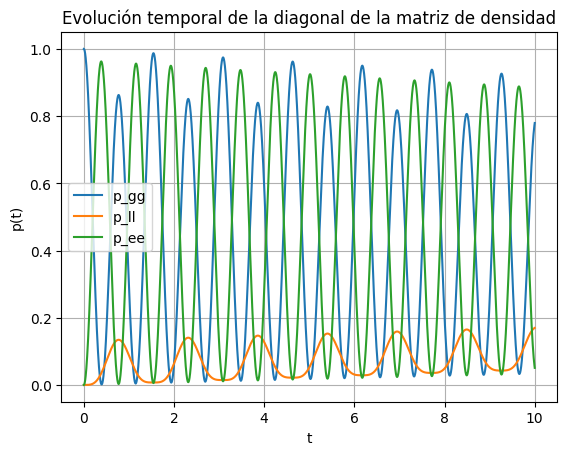

In [39]:
plot(map(x->x[1],ρ2[1]),map(x->x[1],ρ2[2]), label="p_gg")
plot(map(x->x[1],ρ2[1]),map(x->x[5],ρ2[2]), label="p_ll")
plot(map(x->x[1],ρ2[1]),map(x->x[9],ρ2[2]), label="p_ee")
legend()
xlabel("t")
ylabel("p(t)")
title("Evolución temporal de la diagonal de la matriz de densidad")
grid()
show();

In [25]:
Abs2=[]
for i in 1:length(ρ2[1])
    push!(Abs2,ρ2[2][i][4]*f(ρ2[1])[i])
end;

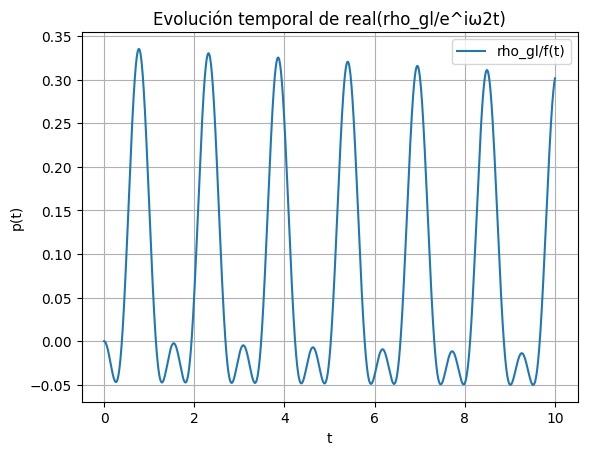

In [46]:
plot(map(x->x[1],ρ2[1]),real(Abs2), label="rho_gl/f(t)")
legend()
xlabel("t")
ylabel("p(t)")
title("Evolución temporal de real(rho_gl/e^iω2t)")
grid()
show();

####  Dato: γ=0.1

In [27]:
γ=.1
ρ3=metodo_RK4h(L,ρ0,0,10,.001);

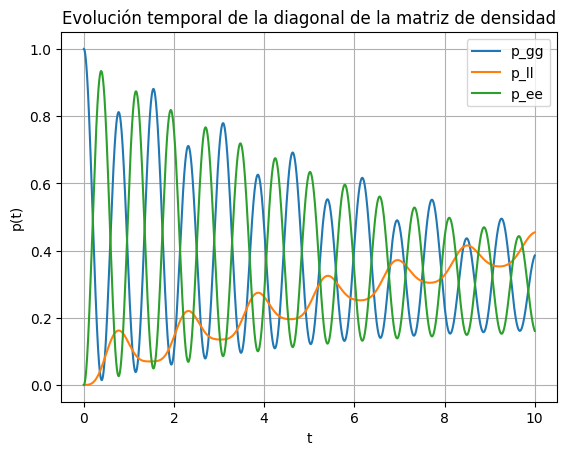

In [37]:
plot(map(x->x[1],ρ3[1]),map(x->x[1],ρ3[2]), label="p_gg")
plot(map(x->x[1],ρ3[1]),map(x->x[5],ρ3[2]), label="p_ll")
plot(map(x->x[1],ρ3[1]),map(x->x[9],ρ3[2]), label="p_ee")
legend()
xlabel("t")
ylabel("p(t)")
title("Evolución temporal de la diagonal de la matriz de densidad")
grid()
show();

In [53]:
Abs3=[]
for i in 1:length(ρ3[1])
    push!(Abs3,ρ3[2][i][4]*(f(ρ3[1])[i]))
end;

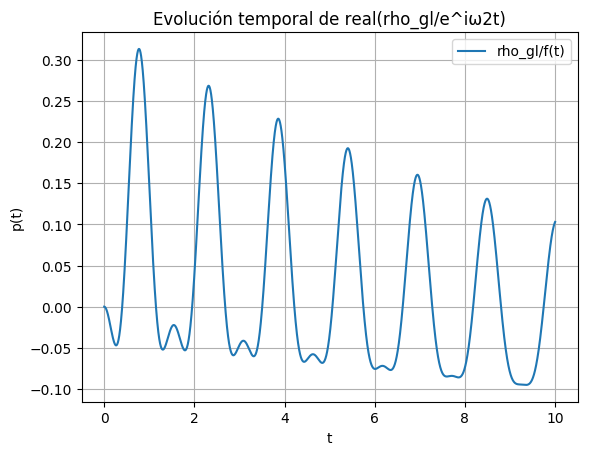

In [55]:
plot(map(x->x[1],ρ3[1]),real(Abs3), label="rho_gl/f(t)")
legend()
xlabel("t")
ylabel("p(t)")
title("Evolución temporal de real(rho_gl/e^iω2t)")
grid()
show();

### Parte II: Suceptibilidad a primer orden

Graficamos la parte real de imaginaria de la suceptibilidad a primer orden $\chi^{(1)}$:

In [96]:
# Definimos un rango de frecuencias ωp

T=linspace(-7,16,1000)

1000-element LinSpace{Float64}:
 -7.0,-6.97698,-6.95395,-6.93093,-6.90791,…,15.9079,15.9309,15.954,15.977,16.0

In [109]:
# Definimos nuestra función chi en términos de nuestros parámetros de frecuencias:

h(x) = k*(4*(ωlg - ωc - ωeg + x)*(Ωc^2 - 4*(ωlg - ωc - ωeg + x)) - 4*(ωlg - ωc - ωeg + x)*γ^2 + 1im*(8*γ*(ωlg - ωc - ωeg + x)^2 + 2*γ*(Ωc)^2 +γ*γ))/abs2(Ωc^2 + (γ+ 1im*2*(ωlg - ωc - ωeg + x))*(γ + 1im*2*(ωlg - ωc - ωeg + x)))

h (generic function with 1 method)

 #### $\Omega_c =0.1 $

In [97]:
#Condiciones físicas
k=1
γ=2
Ωc=3
ωc=4
ωlg=1 # ωlg=ωl-ωg
ωeg=1 # ωeg=ωe-ωg

1

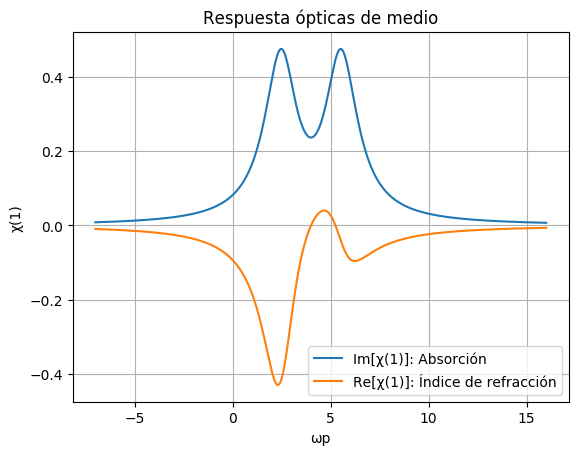

In [98]:
plot(T,imag(h.(T)),label = "Im[χ(1)]: Absorción")
plot(T,real(h.(T)),label = "Re[χ(1)]: Índice de refracción")
title("Respuesta ópticas de medio")
xlabel("ωp")
ylabel("χ(1)")
legend()
grid()

 #### $\Omega_c =3 $

In [108]:
#Condiciones físicas
k=1
γ=2
Ωc=3
ωc=4
ωlg=1 # ωlg=ωl-ωg
ωeg=1 # ωeg=ωe-ωg

1

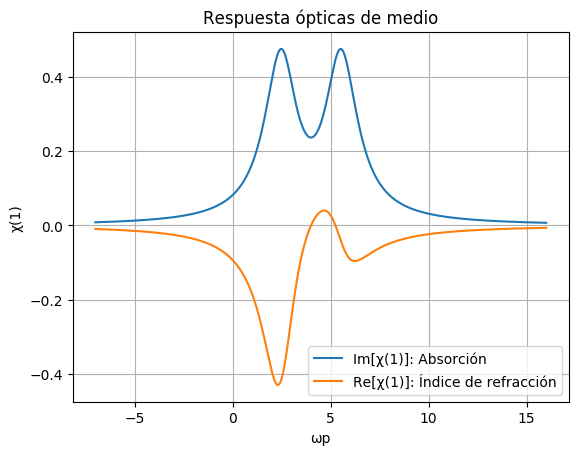

In [110]:
plot(T,imag(h.(T)),label = "Im[χ(1)]: Absorción")
plot(T,real(h.(T)),label = "Re[χ(1)]: Índice de refracción")
title("Respuesta ópticas de medio")
xlabel("ωp")
ylabel("χ(1)")
legend()
grid()

 #### $\Omega_c =10 $

In [105]:
#Condiciones físicas
k=1
γ=2
Ωc=10
ωc=4
ωlg=1 # ωlg=ωl-ωg
ωeg=1 # ωeg=ωe-ωg

1

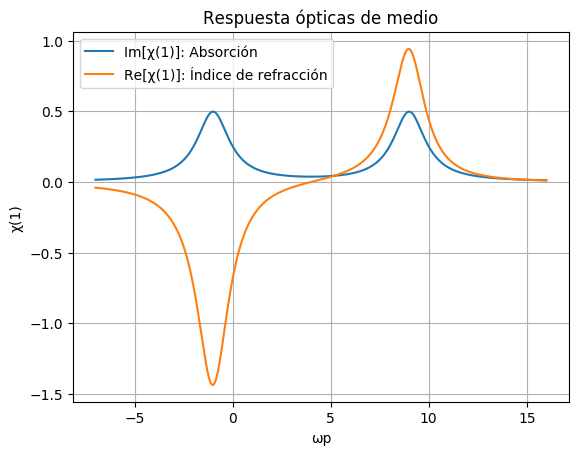

In [107]:
plot(T,imag(h.(T)),label = "Im[χ(1)]: Absorción")
plot(T,real(h.(T)),label = "Re[χ(1)]: Índice de refracción")
title("Respuesta ópticas de medio")
xlabel("ωp")
ylabel("χ(1)")
legend()
grid()

Comprobación de que $\rho$ es hermitica para todo tiempo.

In [31]:
for i in 1:length(ρ[1])
    if ishermitian(ρ[2][i])
    else
        print(false)
    end
end
for i in 1:length(ρ2)
    if ishermitian(ρ2[2][i])
    else
        print(false)
    end
end
for i in 1:length(ρ3)
    if ishermitian(ρ3[2][i])
    else
        print(false)
    end
end
print(true)

true

## Conclusiones

En la primera parte se graficaron los elementos de la matriz de densidad $\rho$. De estas gráficas observa que la periodicidad de las curvas no cambian. Para $\gamma=0$, las amplitudes de los elementos de la matriz de densidad y de $p(t)$ se mantienen constante, ya que no hay decaemiento. Mientras aumenta $\gamma$ a valores diferentes de cero, se puede notar como las amplitudes de los elementos $\rho_{gg}$ y $\rho_{ee}$ decrecen mientras que $\rho_{ll}$ aumenta. Dado que los estados base y excitado corresponden al medio atómico, y el estado acoplado es un estado adicional que general la interferencia cuántica, esto indica que mientras aumenta $\gamma$, aumenta la probabilidad de que se encuentre en el estado $\rho_{ll}$ debido a la interferencia cuántica.

Por otro lado, se graficaron la parte real e imaginaria de la suceptibilidad $\chi^{(1)}$ los cuales describen la absorción y el indice de refracción del medio respectivamente. Se tomaron valores diferentes de la frecuencia de Rabi $\Omega_c$ y se observó que este parámetro afecta la región de transparencia inducida por el campo electrómagnético.

## Referencias

[1] Electromagnetically induced transparency: Optics in coherent media, Marangos et al. (2005), Rev. Mod. Phys., Vol. 77, No. 2

[2] Scully M.O., Zubairy M.S., Quantum Optics, 2001, Cambridge University Press

*****
```python
Integrantes:
Alfredo A. Hernández  
Fausto F. Morales
```
